In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import os
import glob
import re

In [15]:
path = "resale-flat-prices/"
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
df_dict = {}
for f in csv_files:
    country = re.findall(r'[A-Z]{2}', f)[0]
    # read the csv file
    df_dict[country] = pd.read_csv(f, encoding = "ISO-8859-1")

In [2]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [5]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,138454.000000,138454.000000,1.384540e+05
mean,97.748035,1995.399815,4.736284e+05
std,24.095382,13.644220,1.641942e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.530000e+05
50%,94.000000,1996.000000,4.410000e+05
75%,113.000000,2006.000000,5.600000e+05
max,249.000000,2019.000000,1.418000e+06


In [6]:
df.describe(include='object')

,month,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease
count,138454,138454,138454,138454,138454,138454,138454,138454
unique,70,26,7,2623,560,17,21,655
top,2021-08,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,Model A,94 years 11 months
freq,2739,11788,57742,451,1988,31879,45953,1190


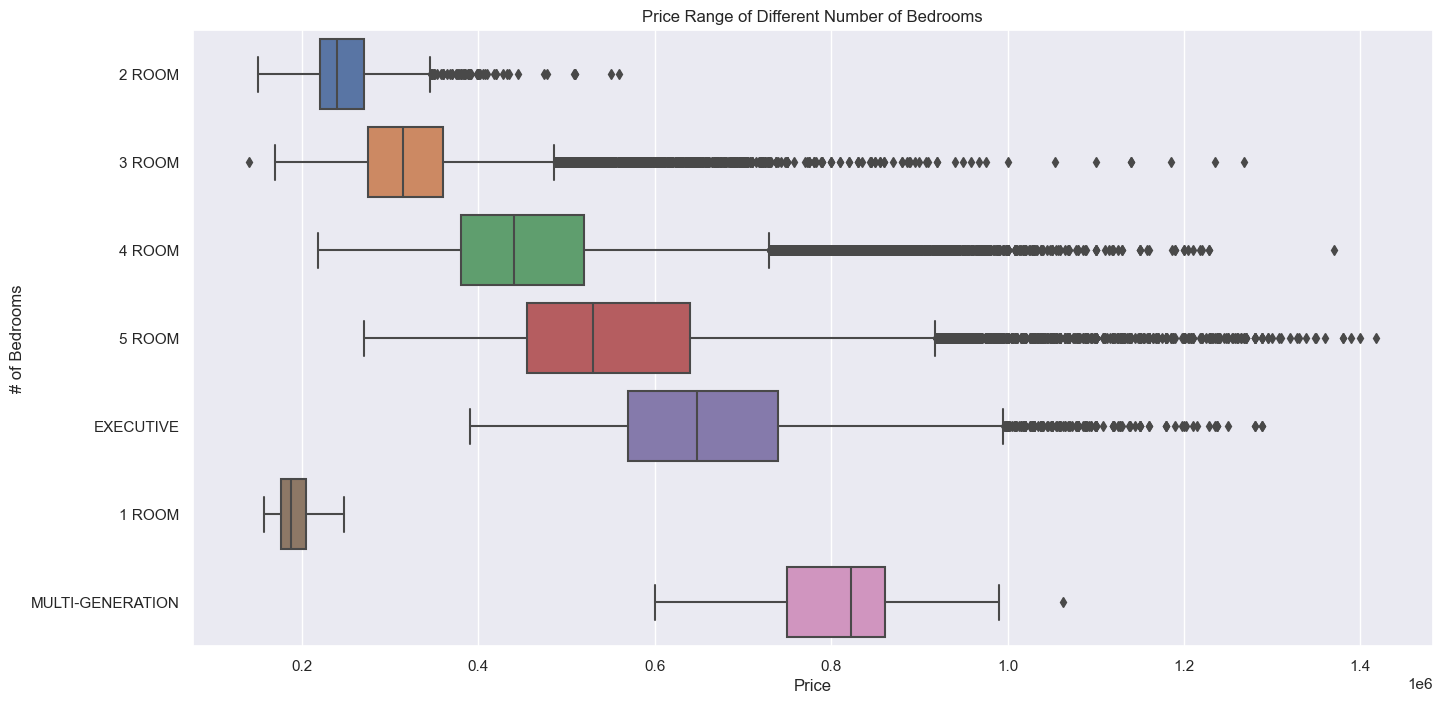

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df, x="resale_price", y="flat_type", ax=ax)
ax.set(title='Price Range of Different Number of Bedrooms', xlabel='Price', ylabel='# of Bedrooms')
plt.show()

In [7]:
# group by month and flat type, to see how average resale prices change over time for different flat types
df2 = df.groupby(['month','flat_type'], as_index=False).mean()

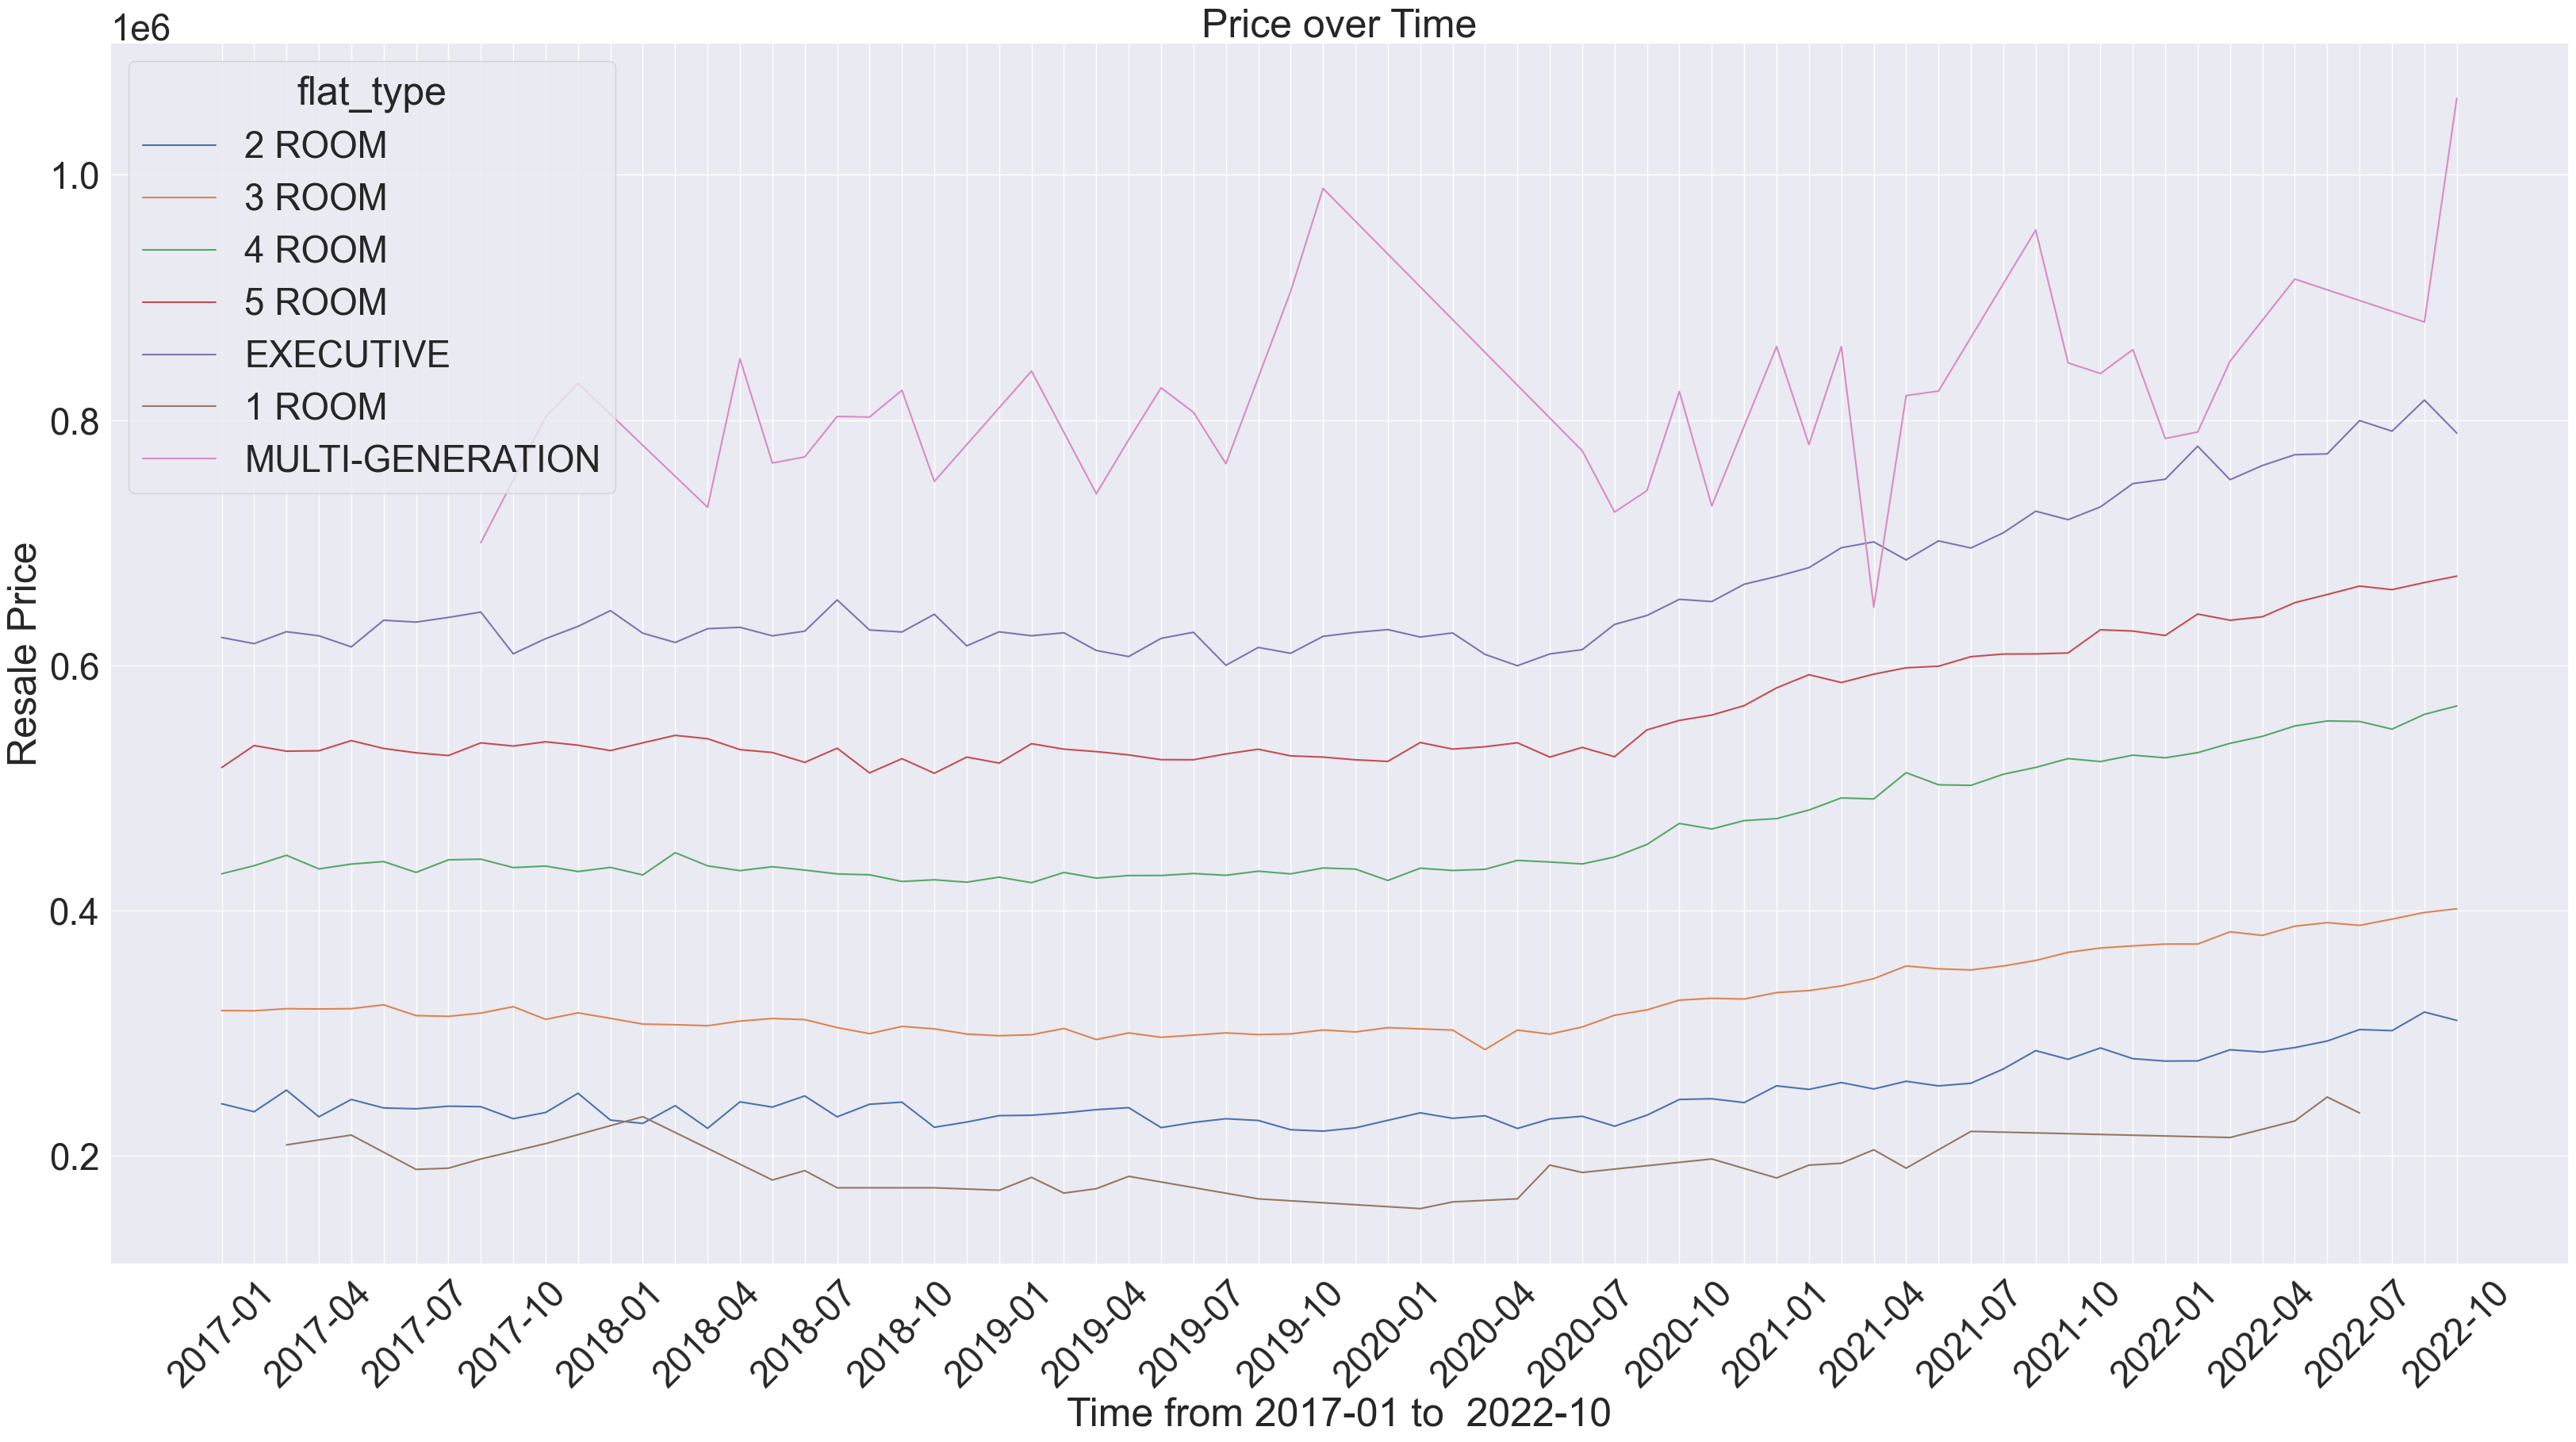

In [8]:
sns.set_theme()
sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40, 20))
sns.lineplot(data=df2, x="month", y="resale_price", hue='flat_type', ax=ax)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set(title='Price over Time', xlabel='Time from 2017-01 to  2022-10', ylabel='Resale Price')
plt.show()

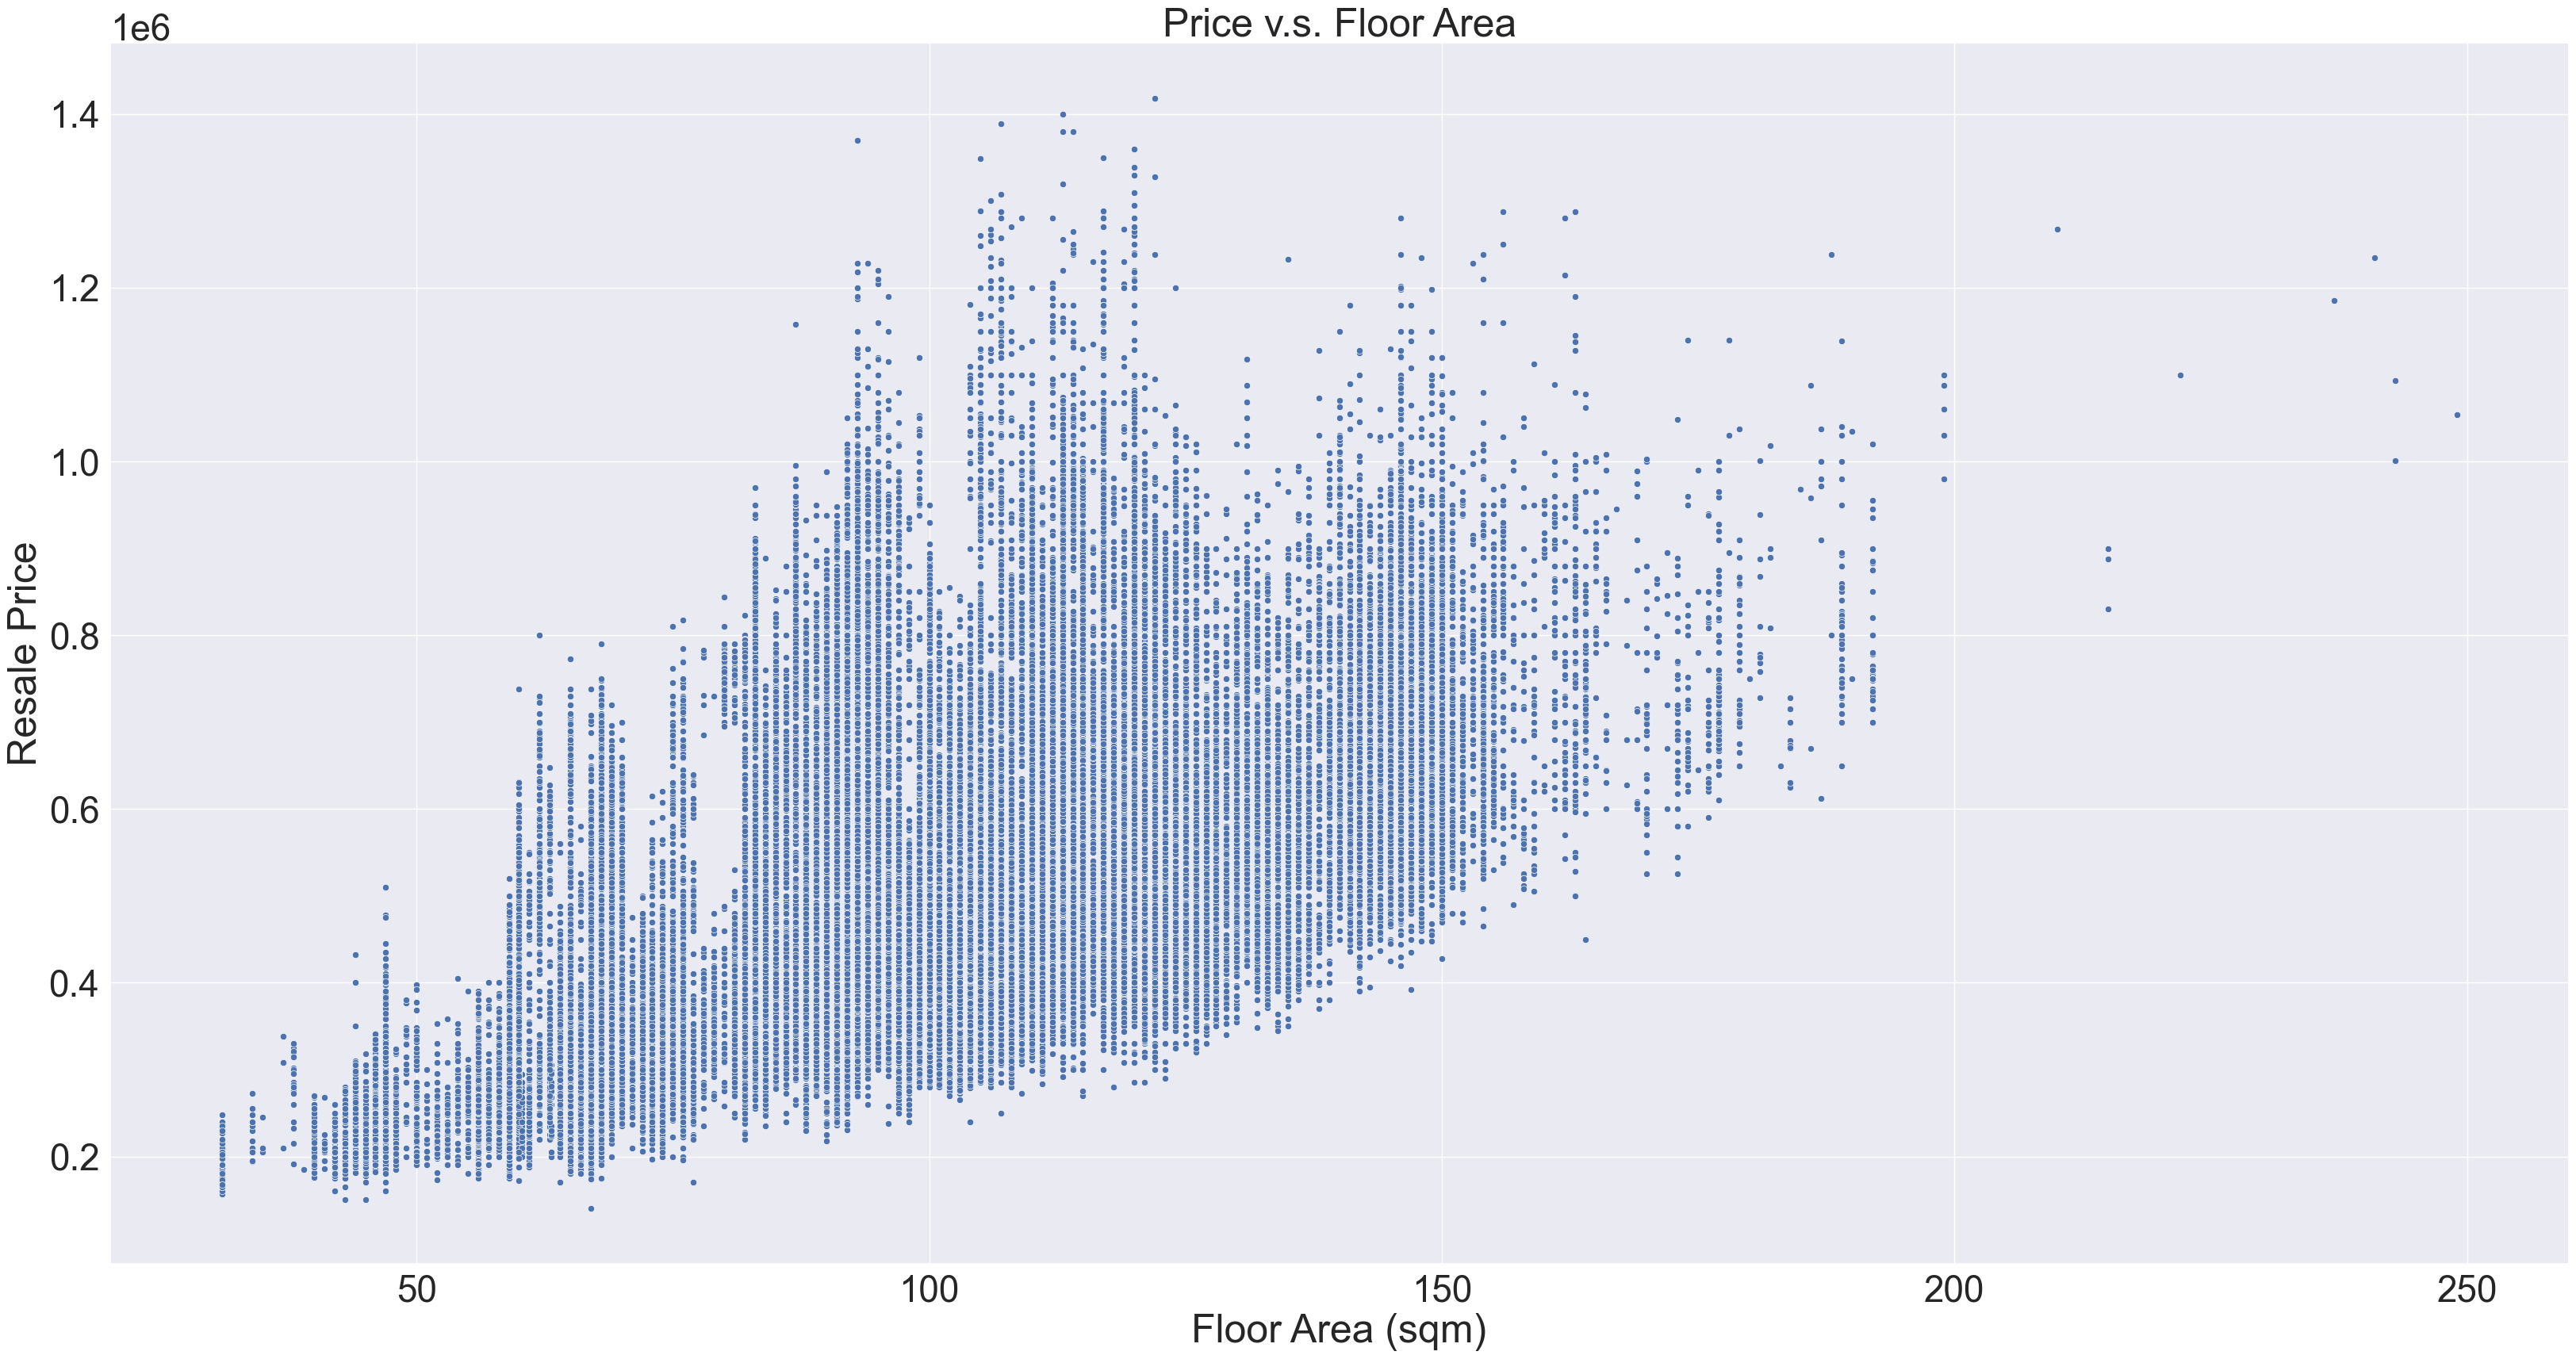

In [9]:
fig, ax = plt.subplots(figsize=(40, 20))
sns.set(font_scale=3)
sns.scatterplot(data=df, x="floor_area_sqm", y="resale_price", ax=ax)
ax.set(title='Price v.s. Floor Area', xlabel='Floor Area (sqm)', ylabel='Resale Price')
plt.show()

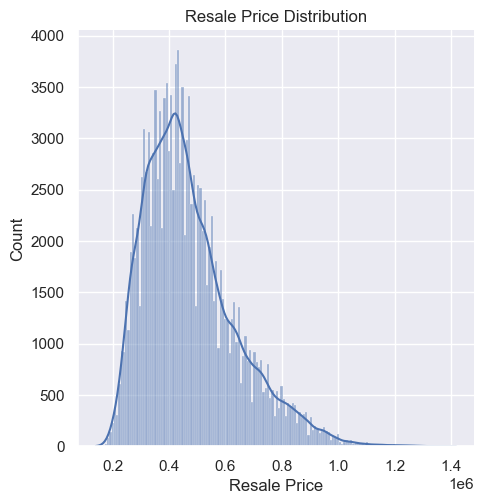

In [10]:
sns.set(font_scale=1)
ax = sns.displot(data=df, x="resale_price", kde=True)
ax.set(title='Resale Price Distribution', xlabel='Resale Price')
plt.show()

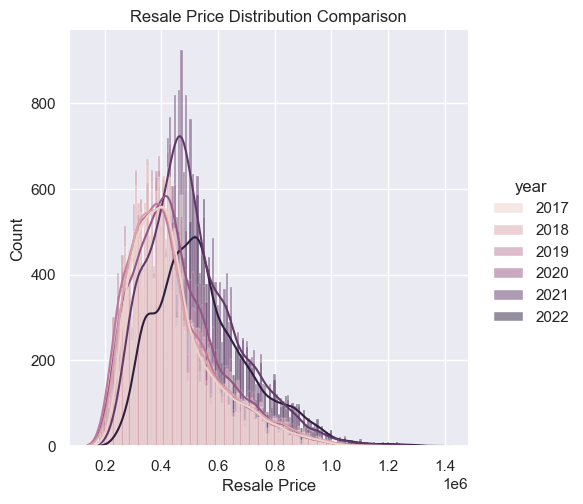

In [11]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')
df['year'] = df['month'].dt.year
sns.set(font_scale=1)
ax = sns.displot(data=df, x="resale_price", hue='year', kde=True)
ax.set(title='Resale Price Distribution Comparison', xlabel='Resale Price', ylabel='Count')
plt.show()

In [12]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017


In [13]:
# integer encode for storey_range, flat_type, and remaining_lease
storey_label = {"storey_range": {"01 TO 03": 1, "04 TO 06": 2, "07 TO 09": 3, "10 TO 12": 4, "13 TO 15": 5,\
                                "16 TO 18": 6, "19 TO 21": 7, "22 TO 24": 8, "25 TO 27": 9, "28 TO 30": 10,\
                                "31 TO 33": 11, "34 TO 36": 12, "37 TO 39": 13, "40 TO 42": 14, "43 TO 45": 15,\
                                "46 TO 48": 16, "49 TO 51": 17}}
flat_type_label = {"flat_type": {"1 ROOM": 1, "2 ROOM": 2, "3 ROOM": 3, "4 ROOM": 4, "5 ROOM": 5,\
                                "EXECUTIVE": 6, "MULTI-GENERATION": 7}}
processed_df = df.replace(storey_label)
processed_df = processed_df.replace(flat_type_label)

processed_df['remaining_lease'] = [int(i[0:2]) for i in processed_df.remaining_lease]
processed_df['resale_price_in_thousands'] = processed_df['resale_price'] / 1000

In [14]:
processed_df = processed_df.drop(columns=['block', 'lease_commence_date', 'street_name', 'month','resale_price'])

In [15]:
processed_df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,year,resale_price_in_thousands
0,ANG MO KIO,2,4,44.0,Improved,61,2017,232.0
1,ANG MO KIO,3,1,67.0,New Generation,60,2017,250.0
2,ANG MO KIO,3,1,67.0,New Generation,62,2017,262.0
3,ANG MO KIO,3,2,68.0,New Generation,62,2017,265.0
4,ANG MO KIO,3,1,67.0,New Generation,62,2017,265.0


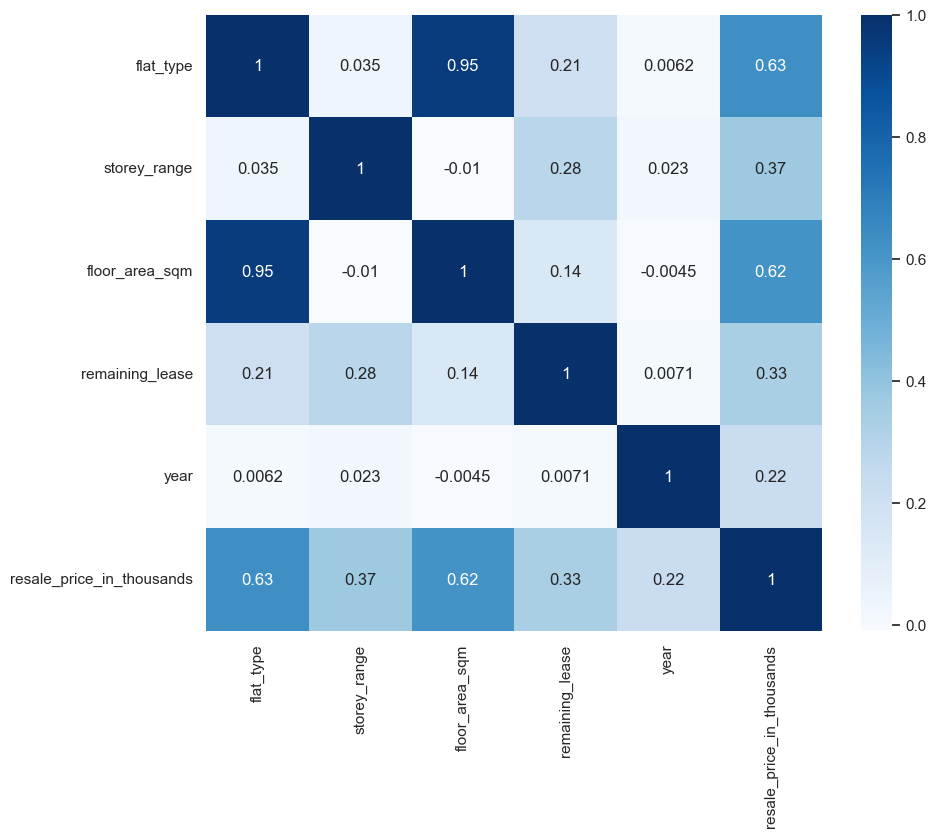

In [16]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(10,8))
corr = processed_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True, square=True, ax = ax)
plt.yticks(rotation=0)
plt.show()

In [17]:
# one-hot encoding for categorical columns (town, and flat_model)
processed_df = pd.get_dummies(processed_df, columns=['town', 'flat_model'], prefix=['town', 'flat_model'])

In [18]:
processed_df.head()

,flat_type,storey_range,floor_area_sqm,remaining_lease,year,resale_price_in_thousands,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,2,4,44.0,61,2017,232.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,67.0,60,2017,250.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,67.0,62,2017,262.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2,68.0,62,2017,265.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,1,67.0,62,2017,265.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
# Split data into training and testing data
X = processed_df.drop(columns=['resale_price_in_thousands'])
y = processed_df['resale_price_in_thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Linear Regression Model
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores  

array([0.85767563, 0.85519917, 0.85656017, 0.85685712, 0.85693403])

In [22]:
lr.fit(X_train, y_train) #training the algorithm
y_test_pred_lr = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))

Mean Absolute Error: 48.42193935859547
Mean Squared Error: 3836.464947715046
Root Mean Squared Error: 61.93920364127268


In [23]:
# Decision Tree Model
dtr = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dtr.fit(X, y)
y_test_pred_dtr = dtr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_dtr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_dtr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dtr)))

Mean Absolute Error: 11.19519900563403
Mean Squared Error: 361.73521553424905
Root Mean Squared Error: 19.019337936275516


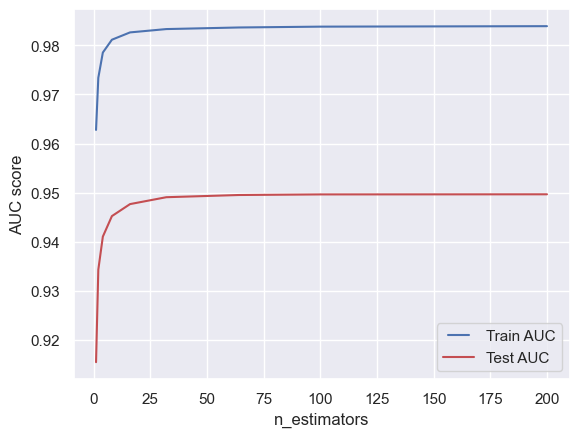

In [33]:
# Parameter tuning for Random Forest Regressor
# 1. number of estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(metrics.r2_score(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(metrics.r2_score(y_test, y_pred))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train Score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('n_estimators')
plt.show()

# choose 32

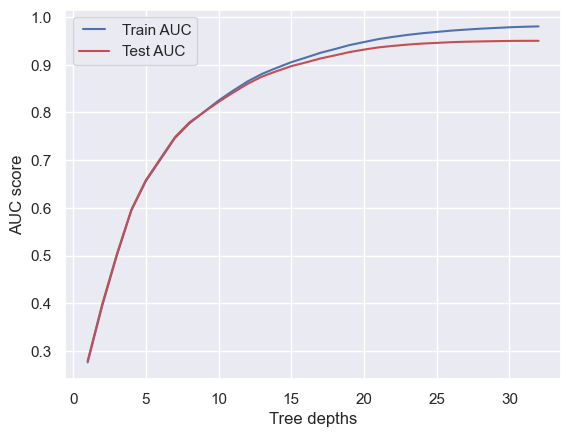

In [36]:
# 2. maximum depth of trees
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestRegressor(max_depth=int(max_depth), n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(metrics.r2_score(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(metrics.r2_score(y_test, y_pred))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('Tree depths')
plt.show()

# choose 25

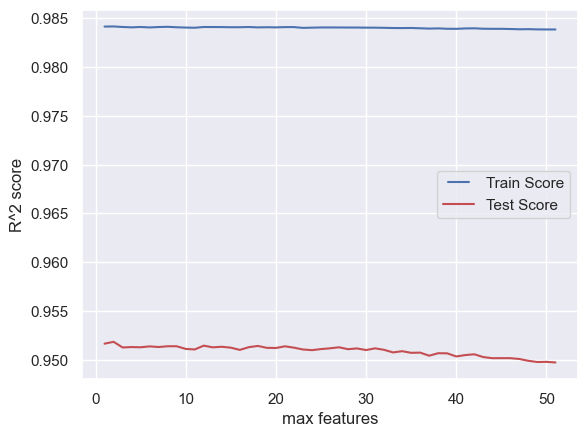

In [40]:
# 3. maximum number of features to be included at each node split
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestRegressor(max_features=max_feature)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(metrics.r2_score(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(metrics.r2_score(y_test, y_pred))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train Score')
line2, = plt.plot(max_features, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('max features')
plt.show()

In [41]:
# Final Random Forest Model
rfr = RandomForestRegressor(random_state=0, 
                            n_estimators = 32, 
                            max_features=20,
                            max_depth = 25)
# fit the model on the whole dataset
rfr.fit(X_train, y_train)
y_test_pred_rfr = rfr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_rfr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfr)))

Mean Absolute Error: 26.99418112513471
Mean Squared Error: 1441.8465710323956
Root Mean Squared Error: 37.971654836633014
